### Installation

In [1]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#      install.packages("BiocManager")
#   BiocManager::install("cicero")

Vignette: https://www.bioconductor.org/packages/devel/bioc/vignettes/cicero/inst/doc/website.html

### Import packages

In [2]:
library(cicero)
library(data.table)
library(Matrix)
library(proxy)
library(reshape2)
library(BuenColors)
library(umap)

Loading required package: monocle
Loading required package: Matrix
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank,

### Load Data

In [3]:
load('../../run_methods/Cicero/Cicero_cusanovich2018subset.RData')

### Cluster cells

In [4]:
dim(datafr)
dim(fm_Cicero)

[1] 385237  12178

[1] 16792 12178

In [5]:
fm_Cicero[1:5,1:5]

,TCCGCGAACTAACTAGGTTGCTACGGTCATAGAGGC,TCCGCGAAAGGTCAGCTTTGCGGATAGTGTACTGAC,ATTACTCGTTGCCGTAGGCTTAATCTTGTATAGCCT,TCCGCGAAACCAGGCGCAAAGCTAGGTTGTACTGAC,ATTCAGAATCGTAGCATCGCGCAATGACCCTATCCT
0610005C13Rik,0,0,0,0,0.0000000000
0610007C21Rik,0,0,0,0,0.0000000000
0610007N19Rik,0,0,0,0,0.0003997326
0610008F07Rik,0,0,0,0,0.0000000000
0610009B14Rik,0,0,0,0,0.0000000000


In [6]:
pd <- new("AnnotatedDataFrame", data = data.frame(label=metadata[colnames(fm_Cicero),'label'],row.names =colnames(fm_Cicero)))
fd <- new("AnnotatedDataFrame", data = data.frame(row.names =rownames(fm_Cicero)))
cds <- newCellDataSet(fm_Cicero, phenoData = pd, featureData = fd, expressionFamily = tobit())

Warning message in newCellDataSet(fm_Cicero, phenoData = pd, featureData = fd, expressionFamily = tobit()):
"Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions"Warning message in newCellDataSet(fm_Cicero, phenoData = pd, featureData = fd, expressionFamily = tobit()):
"Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions"Warning message in newCellDataSet(fm_Cicero, phenoData = pd, featureData = fd, expressionFamily = tobit()):
"Warning: featureData must contain a column verbatim named 'gene_short_name' for certain functions"

In [7]:
cds <- detectGenes(cds)
cds <- estimateSizeFactors(cds)
# cds <- estimateDispersions(cds)

In [8]:
cds <- reduceDimension(cds, max_components = 2, num_dim = 15,reduction_method = 'tSNE', verbose = T)

Warning message in if (cds@expressionFamily@vfamily %in% c("negbinomial", "negbinomial.size")) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (cds@expressionFamily@vfamily == "binomialff") {:
"the condition has length > 1 and only the first element will be used"Warning message in if (cds@expressionFamily@vfamily == "Tobit") {:
"the condition has length > 1 and only the first element will be used"Warning message in if (cds@expressionFamily@vfamily == "uninormal") {:
"the condition has length > 1 and only the first element will be used"Remove noise by PCA ...
Reduce dimension by tSNE ...


In [9]:
cds <- clusterCells(cds,num_clusters = length(unique(metadata$label)),method = 'densityPeak')

Distance cutoff calculated to 4.847424 


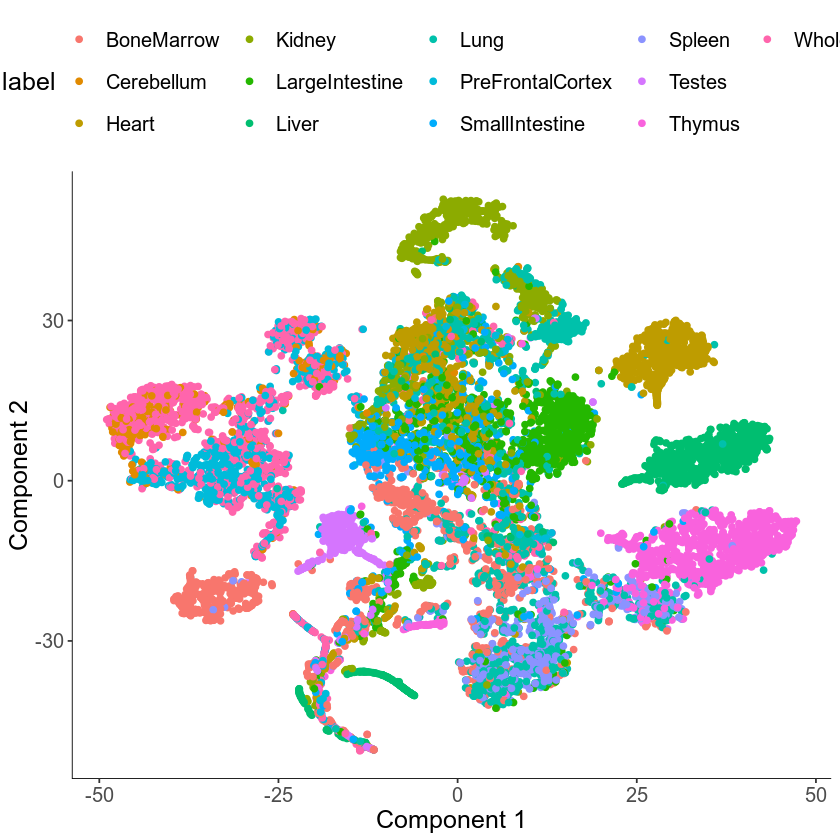

In [10]:
plot_cell_clusters(cds, 1, 2, color = "label")

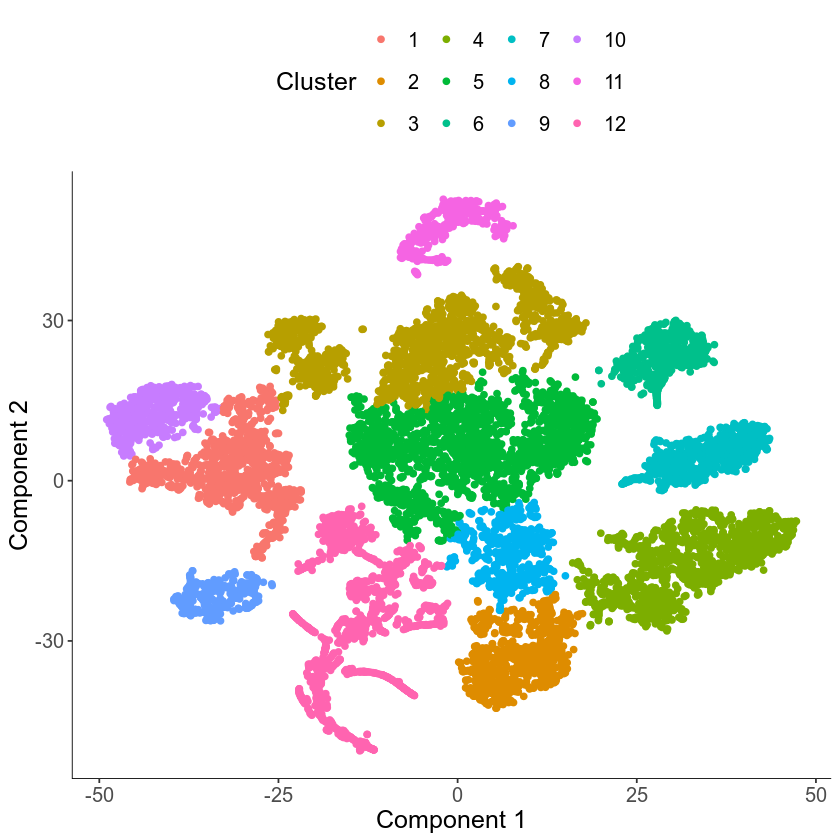

In [11]:
plot_cell_clusters(cds, 1, 2, color = "Cluster")

In [12]:
df_out = data.frame(Cicero = cds$Cluster, row.names = sampleNames(phenoData(cds)))

In [13]:
all(rownames(df_out) == rownames(metadata))

[1] TRUE

In [14]:
head(df_out)

,Cicero
TCCGCGAACTAACTAGGTTGCTACGGTCATAGAGGC,5
TCCGCGAAAGGTCAGCTTTGCGGATAGTGTACTGAC,12
ATTACTCGTTGCCGTAGGCTTAATCTTGTATAGCCT,5
TCCGCGAAACCAGGCGCAAAGCTAGGTTGTACTGAC,8
ATTCAGAATCGTAGCATCGCGCAATGACCCTATCCT,9
ATTCAGAAATGGCGCCTGTGCGGATAGTAGGCGAAG,8


In [15]:
write.table(df_out, file='clusteringSolution.tsv', quote=FALSE, sep='\t', col.names = NA)